In [50]:
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings("ignore")


In [28]:
pd.set_option("display.max_columns",200)

df = pd.read_csv("UCI_Credit_Card.csv",delimiter=",")

col1,col2 = df.shape
print("In this dataset {} rows and {} columns".format(df.shape[0],df.shape[1]))

In this dataset 30000 rows and 25 columns


In [29]:
print(df.shape)
#take some random samples on the data
np.random.seed(1)
df.sample(n=10)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,0,0,172772.0,152397.0,110375.0,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,2,32.0,-358.0,-748.0,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,-1,430.0,0.0,46257.0,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,3,2,36649.0,39448.0,40101.0,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,2,0,20979.0,17228.0,20924.0,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0
17458,17459,140000.0,2,3,1,30,0,0,0,0,2,0,93157.0,96304.0,98007.0,82227.0,65000.0,60848.0,4700.0,4505.0,12906.0,0.0,2210.0,2300.0,0
1476,1477,200000.0,1,2,2,26,-1,-1,0,0,0,0,1747.0,11817.0,14225.0,16017.0,12613.0,6600.0,12957.0,3884.0,5010.0,700.0,360.0,1713.0,0
5120,5121,150000.0,1,2,2,37,-1,0,0,0,0,0,69012.0,63265.0,64131.0,64942.0,61803.0,58987.0,2500.0,2500.0,3780.0,2200.0,2000.0,2000.0,0
18338,18339,20000.0,2,2,2,22,0,0,0,0,0,0,16990.0,17960.0,18923.0,19706.0,19818.0,20006.0,3000.0,3001.0,3000.0,2000.0,1002.0,783.0,0
28279,28280,230000.0,2,2,2,36,-2,-1,-1,-1,-1,-1,858.0,885.0,669.0,656.0,827.0,2360.0,885.0,669.0,656.0,827.0,2376.0,943.0,0


In [30]:
df.isnull().sum()
#missing values for surity

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [32]:
#change the column names in pay_0 and default.payment.next.month

df.rename(columns={"default.payment.next.month":"def_pay"},inplace=True)
df.rename(columns={"PAY_0":"PAY_1"},inplace=True)

In [33]:
df.info()
#checking the datatypes of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

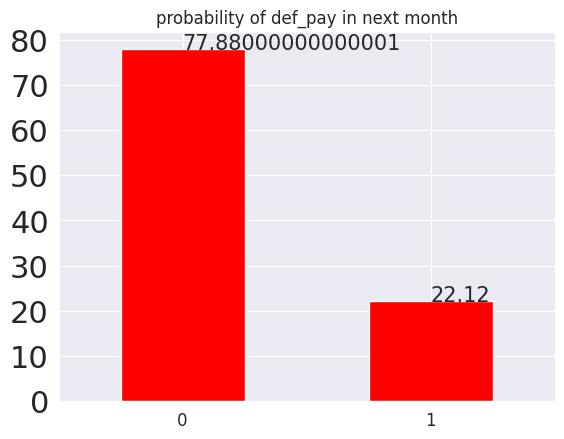

In [34]:
def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(color="red")
plt.xticks(fontsize=12,rotation=0)
plt.yticks(fontsize=22)
plt.title("probability of def_pay in next month")
for i,j in list(zip([0,1],def_cnt)):
    plt.text(i,j,j,fontsize=15)
plt.show()

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

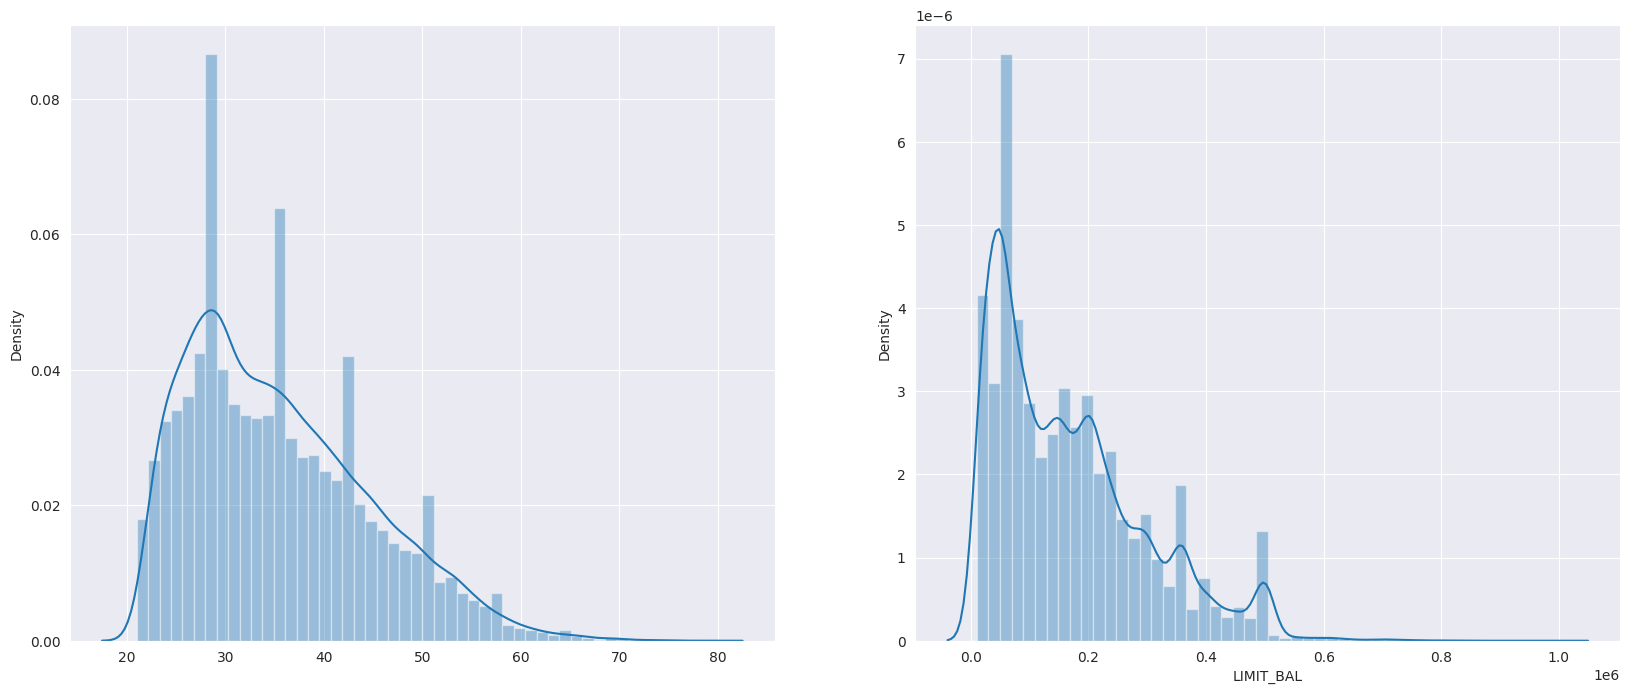

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(x=df["AGE"])
#sub plots
plt.subplot(1,2,2)
sns.set_style("whitegrid")
sns.distplot(df["LIMIT_BAL"],kde=True)


In [36]:
bins = [20,30,40,50,60,70,80]
labels=["21-30","31-40","41-50",
        "51-60","61-70","71-80"]
df["AGE_BIN"] = pd.cut(x=df.AGE,bins=bins,
                       labels=labels,right=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60


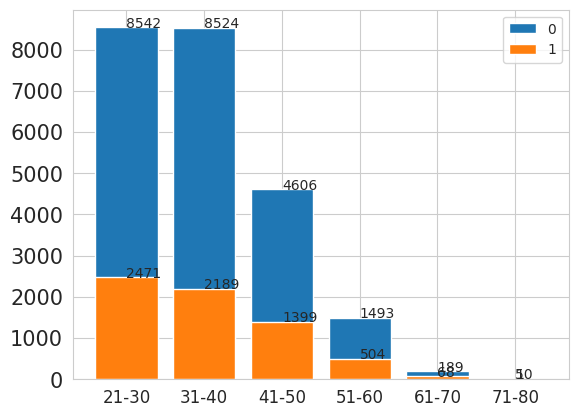

In [37]:
#plt.figure(figsize=(12,9))
age_0 = (df.AGE_BIN[df.def_pay==0].value_counts())
age_1 = (df.AGE_BIN[df.def_pay==1].value_counts())
plt.bar(age_0.index,age_0.values,label="0")
plt.bar(age_1.index,age_1.values,label="1")
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
for x,y in list(zip(age_0.index,age_0.values)):
    plt.text(x,y,y)
for i,j in list(zip(age_1.index,age_1.values)):
    plt.text(i,j,j)
plt.legend()
plt.show()



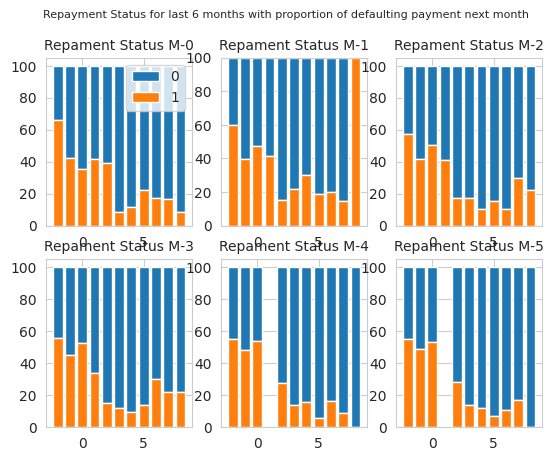

In [38]:

#plt.subplots(figsize=(25,15))
#month0
ind = sorted(df.PAY_1.unique())
pay_0 = df.PAY_1[df.def_pay==0].value_counts(normalize=True)
pay_1 = df.PAY_1[df.def_pay==1].value_counts(normalize=True)

        
total = pay_0.values+pay_1.values

pay_prop_0 = np.true_divide(pay_0,total)*100
pay_prop_1 = np.true_divide(pay_1,total)*100

plt.subplot(2,3,1)

plt.bar(ind,pay_prop_1,label="0",bottom=pay_prop_0)
plt.bar(ind,pay_prop_0,label="1")
plt.title("Repament Status M-0",fontsize=10)
plt.legend()

#month1
ind2 = sorted(df.PAY_2.unique())
pay_2_0 = df.PAY_2[df.def_pay==0].value_counts(normalize=True)
pay_2_1 = df.PAY_2[df.def_pay==1].value_counts(normalize=True)

for i in pay_2_0.index:
    if i not in pay_2_1.index:
        pay_2_1[i]=0
        
total_2 = pay_2_0.values+pay_2_1.values

pay_2_prop_0 = np.true_divide(pay_2_0,total_2)*100
pay_2_prop_1 = np.true_divide(pay_2_1,total_2)*100

plt.subplot(2,3,2)

plt.bar(ind2,pay_2_prop_1,label="0",bottom=pay_2_prop_0)
plt.bar(ind2,pay_2_prop_0,label="1")
plt.title("Repament Status M-1",fontsize=10)

#month2
ind3 = sorted(df.PAY_3.unique())
pay_3_0 = df.PAY_3[df.def_pay==0].value_counts(normalize=True)
pay_3_1 = df.PAY_3[df.def_pay==1].value_counts(normalize=True)

for i in pay_3_0.index:
    if i not in pay_3_1.index:
        pay_3_1[i]=0
        
total_3 = pay_3_0.values+pay_3_1.values

pay_3_prop_0 = np.true_divide(pay_3_0,total_3)*100
pay_3_prop_1 = np.true_divide(pay_3_1,total_3)*100

plt.subplot(2,3,3)

plt.bar(ind3,pay_3_prop_1,label="0",bottom=pay_3_prop_0)
plt.bar(ind3,pay_3_prop_0,label="1")
plt.title("Repament Status M-2",fontsize=10)

#month3
ind4 = sorted(df.PAY_4.unique())
pay_4_0 = df.PAY_4[df.def_pay==0].value_counts(normalize=True)
pay_4_1 = df.PAY_4[df.def_pay==1].value_counts(normalize=True)
for i in pay_4_0.index:
    if i not in pay_4_1.index:
        pay_4_1[i]=0
        
total_4 = pay_4_0.values+pay_4_1.values
pay_4_prop_0 = np.true_divide(pay_4_0,total_4)*100
pay_4_prop_1 = np.true_divide(pay_4_1,total_4)*100
plt.subplot(2,3,4)
plt.bar(ind4,pay_4_prop_1,label="0",bottom=pay_4_prop_0)
plt.bar(ind4,pay_4_prop_0,label="1")
plt.title("Repament Status M-3",fontsize=10)

#month4
ind5 = sorted(df.PAY_5.unique())
pay_5_0 = df.PAY_5[df.def_pay==0].value_counts(normalize=True)
pay_5_1 = df.PAY_5[df.def_pay==1].value_counts(normalize=True)

for i in pay_5_0.index:
    if i not in pay_5_1.index:
        pay_5_1[i]=0
        
for i in pay_5_1.index:
    if i not in pay_5_0.index:
        pay_5_0[i]=0
  
       
total_5 = pay_5_0.values+pay_5_1.values

pay_5_prop_0 = np.true_divide(pay_5_0,total_5)*100
pay_5_prop_1 = np.true_divide(pay_5_1,total_5)*100

plt.subplot(2,3,5)

plt.bar(ind5,pay_5_prop_1,label="0",bottom=pay_5_prop_0)
plt.bar(ind5,pay_5_prop_0,label="1")
plt.title("Repament Status M-4",fontsize=10)

#month5
ind6 = sorted(df.PAY_6.unique())
pay_6_0 = df.PAY_6[df.def_pay==0].value_counts(normalize=True)
pay_6_1 = df.PAY_6[df.def_pay==1].value_counts(normalize=True)

for i in pay_6_0.index:
    if i not in pay_6_1.index:
        pay_6_1[i]=0
        
for i in pay_6_1.index:
    if i not in pay_6_0:
        pay_6_0[i] = 0
        
total_6 = pay_6_0.values+pay_6_1.values

pay_6_prop_0 = np.true_divide(pay_6_0,total_6)*100
pay_6_prop_1 = np.true_divide(pay_6_1,total_6)*100

plt.subplot(2,3,6)

plt.bar(ind6,pay_6_prop_1,label="0",bottom=pay_6_prop_0)
plt.bar(ind6,pay_6_prop_0,label="1")
plt.title("Repament Status M-5",fontsize=10)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month",fontsize=8)

plt.show()


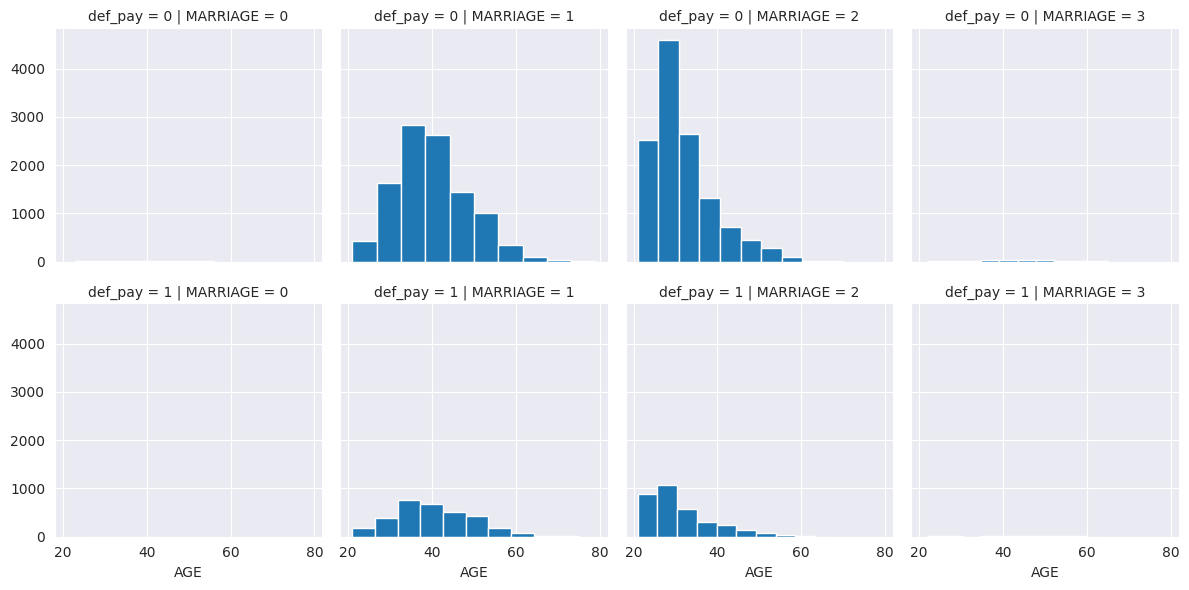

In [39]:
sns.set_style("darkgrid")
grid = sns.FacetGrid(df,row="def_pay",col="MARRIAGE")
grid.map(plt.hist,"AGE")

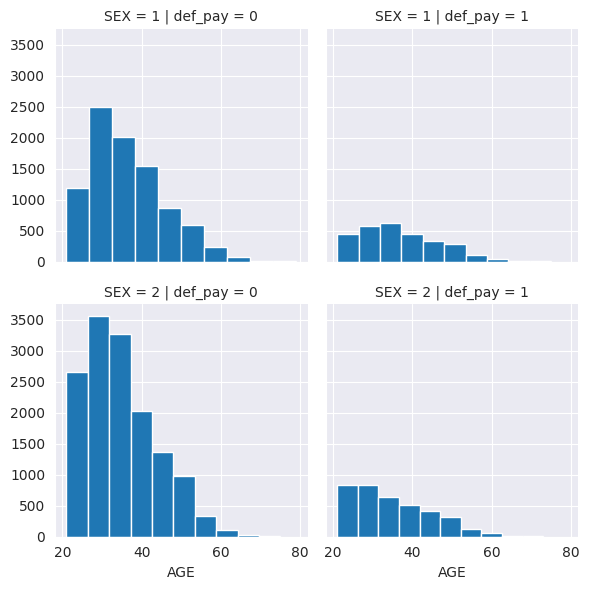

In [40]:
g = sns.FacetGrid(df,col="def_pay",row="SEX")
g.map(plt.hist,"AGE")

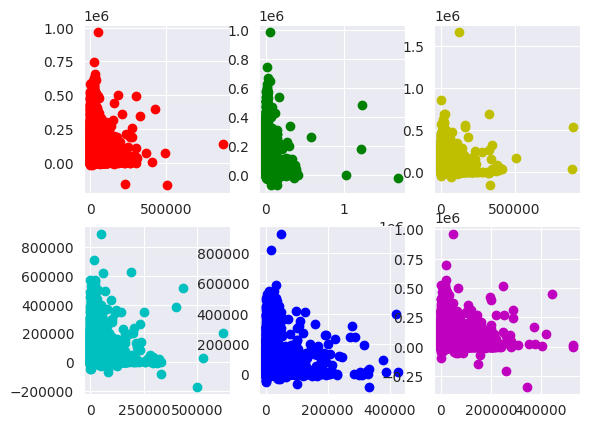

In [41]:
#bill amount in past 6 months

plt.subplot(2,3,1)
plt.scatter(x=df["PAY_AMT1"],
            y=df["BILL_AMT1"],
            c="r")
plt.subplot(2,3,2)
plt.scatter(x=df["PAY_AMT2"],
            y=df["BILL_AMT2"],
            c="g")
plt.subplot(2,3,3)
plt.scatter(x=df["PAY_AMT3"],
            y=df["BILL_AMT3"],
            c="y")
plt.subplot(2,3,4)
plt.scatter(x=df["PAY_AMT4"],
            y=df["BILL_AMT4"],
            c="c")
plt.subplot(2,3,5)
plt.scatter(x=df["PAY_AMT5"],
            y=df["BILL_AMT5"],
            c="b")
plt.subplot(2,3,6)
plt.scatter(x=df["PAY_AMT6"],
            y=df["BILL_AMT6"],
            c="m")
plt.show()

<AxesSubplot:>

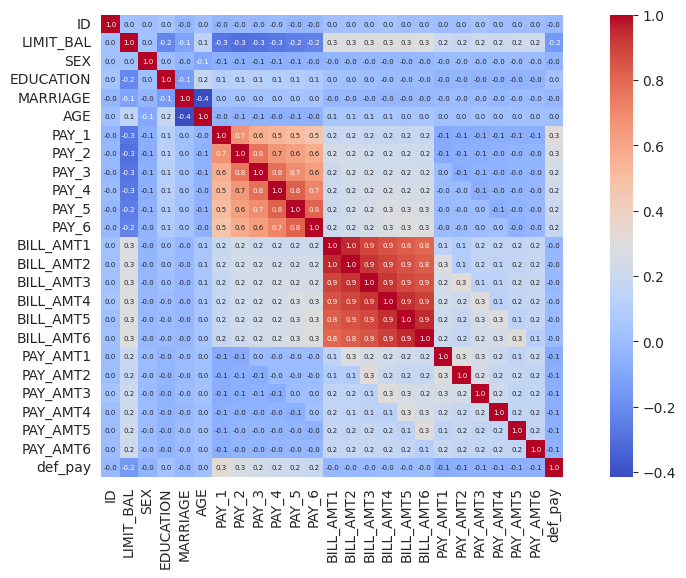

In [42]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cbar=True,
           square=True,annot_kws={"size":5},
           fmt=".1f",cmap="coolwarm")


In [43]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,AGE_BIN
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60


In [52]:
#split the data for training and testing 

X = df.drop(["ID","AGE_BIN","AGE"],axis=1)
y = df[["def_pay"]]

#X = X.apply(pd.to_numeric,errors="coerce")
#y = y.apply(pd.to_numeric,errors="coerce")

sc= StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=4)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logrig = LogisticRegression()
logrig.fit(X_train,y_train)

pred = logrig.predict(X_test)
accuracy = accuracy_score(y_test,pred)*100
print('accuracy of logistic regression:',accuracy)

accuracy of logistic regression: 100.0


[[4638    0]
 [   0 1362]]


<AxesSubplot:>

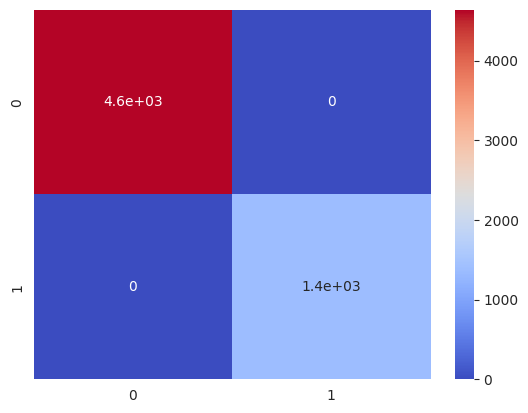

In [53]:
cm = confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,
           cbar=True,cmap="coolwarm")

In [54]:
clr = classification_report(y_test,pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4638
           1       1.00      1.00      1.00      1362

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(x_train,y_train)

pred2 = knc.predict(x_test)

accuracy = accuracy_score(y_test,pred2)*100
print("accuracy of KNeighbors classifier {} ".format(accuracy))

accuracy of KNeighbors classifier 99.23333333333333 


[[4638    0]
 [   0 1362]]


<AxesSubplot:>

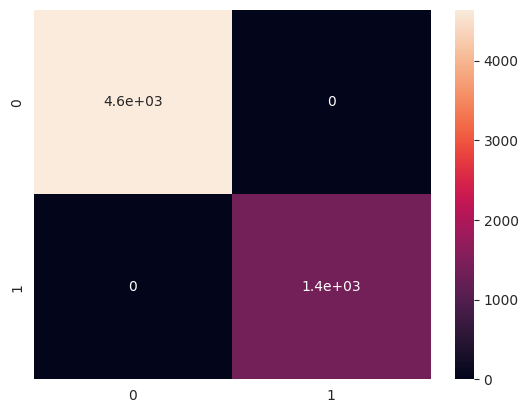

In [60]:
cm2 = confusion_matrix(y_test,pred2)
print(cm)
sns.heatmap(cm,annot=True)

In [61]:
cls2 = classification_report(y_test,pred2)
print(cls2)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4663
           1       1.00      0.97      0.98      1337

    accuracy                           0.99      6000
   macro avg       0.99      0.98      0.99      6000
weighted avg       0.99      0.99      0.99      6000

